In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv("dataset/fifadata.csv")
data.head(20)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [2]:
from IPython.display import display

def describe(data: pd.core.frame.DataFrame):
    start = 0;
    end= start + 10;
    while end <= data.columns.size and start < data.columns.size:
        display(f"Data from {start+1} to {end}")
        data1 = data.iloc[:,start:end]
        display(data1.head())
        #display(data1.describe())
        display("======================================================================================================")
        start=end;
        end=start+10;
        if (end >= data.columns.size):
            end=data.columns.size


In [3]:
noFeatureColumns = ['Unnamed: 0','ID','Photo','Flag','Name','Club Logo','Real Face','Loaned From','Release Clause','Jersey Number']
dataWithPredictableFeature = data.drop(noFeatureColumns,axis=1)


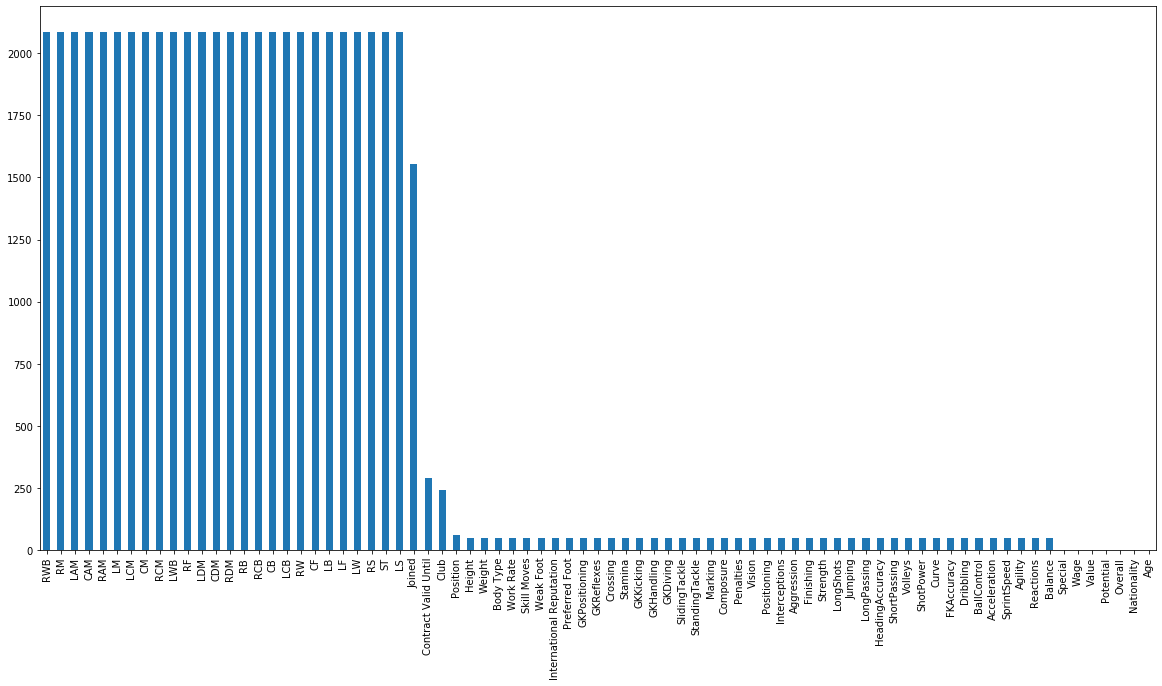

In [4]:
plt.figure(figsize=(20,10))
missing_data = dataWithPredictableFeature.isnull().sum().sort_values(ascending=False)
missing_data.plot.bar()

In [5]:
trash_data = dataWithPredictableFeature[dataWithPredictableFeature['RDM'].isnull()].index
dataWithoutMissingVal = dataWithPredictableFeature.drop(trash_data)

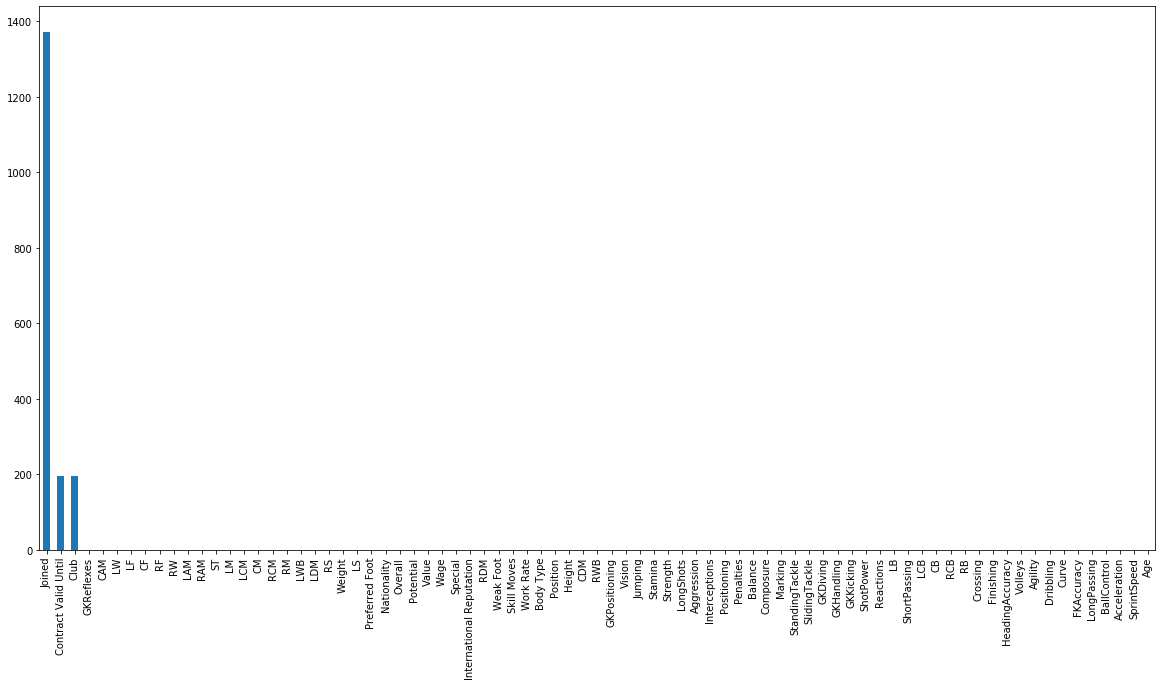

In [6]:
plt.figure(figsize=(20,10))
missing_data_1 = dataWithoutMissingVal.isnull().sum().sort_values(ascending=False)
missing_data_1.plot.bar()

In [7]:
dataWithoutMissingVal.reset_index(drop=True,inplace=True)
dataWithoutMissingVal

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
4,27,Belgium,91,91,Chelsea,€93M,€340K,2142,Right,4.0,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,Right,1.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
16118,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,Right,1.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
16119,16,England,47,67,Cambridge United,€60K,€1K,1189,Right,1.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
16120,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,Right,1.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


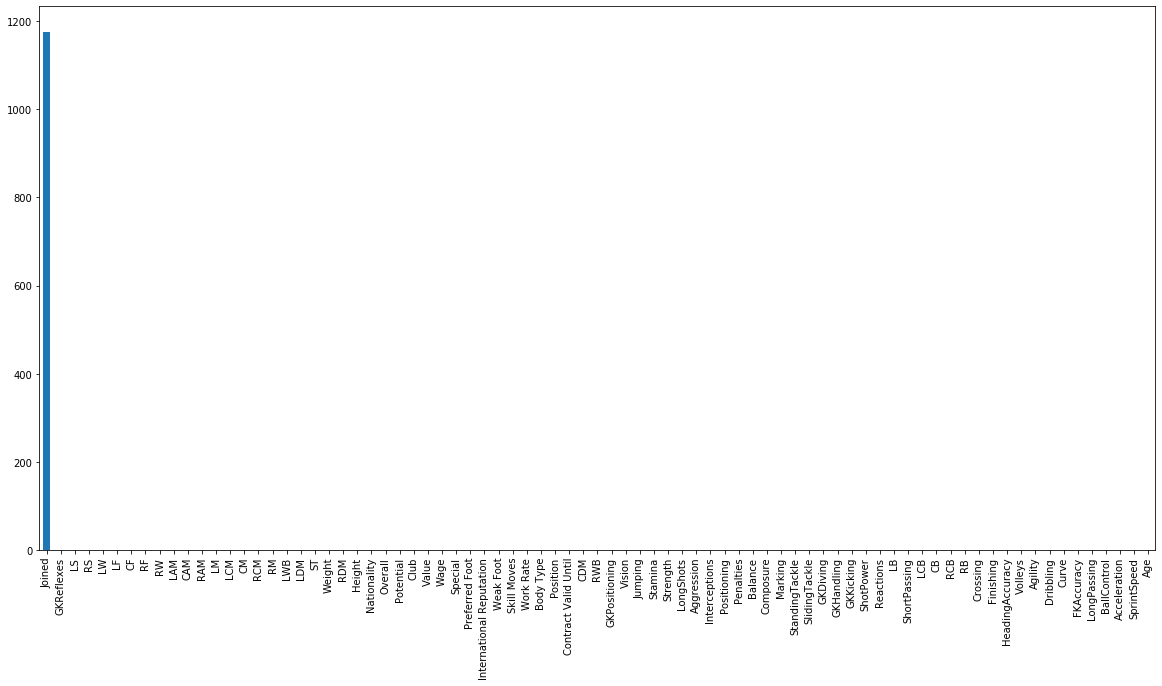

In [8]:
dataWithoutMissingVal = dataWithoutMissingVal.drop(dataWithoutMissingVal[dataWithoutMissingVal['Wage'] == '€0'].index)
dataWithoutMissingVal = dataWithoutMissingVal.drop(dataWithoutMissingVal[dataWithoutMissingVal['Value'] == '€0'].index)
plt.figure(figsize=(20,10))
missing_data_2 = dataWithoutMissingVal.isnull().sum().sort_values(ascending=False)
missing_data_2.plot.bar()

In [9]:
splited = dataWithoutMissingVal["Joined"].str.split(",", n = 1, expand = True)   
dataWithoutMissingVal['monthJoined'] = splited[0]
dataWithoutMissingVal['yearJoined'] = splited[1].astype('float')

In [10]:
yearJoined = (int) (dataWithoutMissingVal['yearJoined'].mean())
dataWithoutMissingVal['yearJoined']  = dataWithoutMissingVal['yearJoined'].fillna(yearJoined)
dataWithoutMissingVal = dataWithoutMissingVal.drop(['monthJoined','Joined'],axis=1)

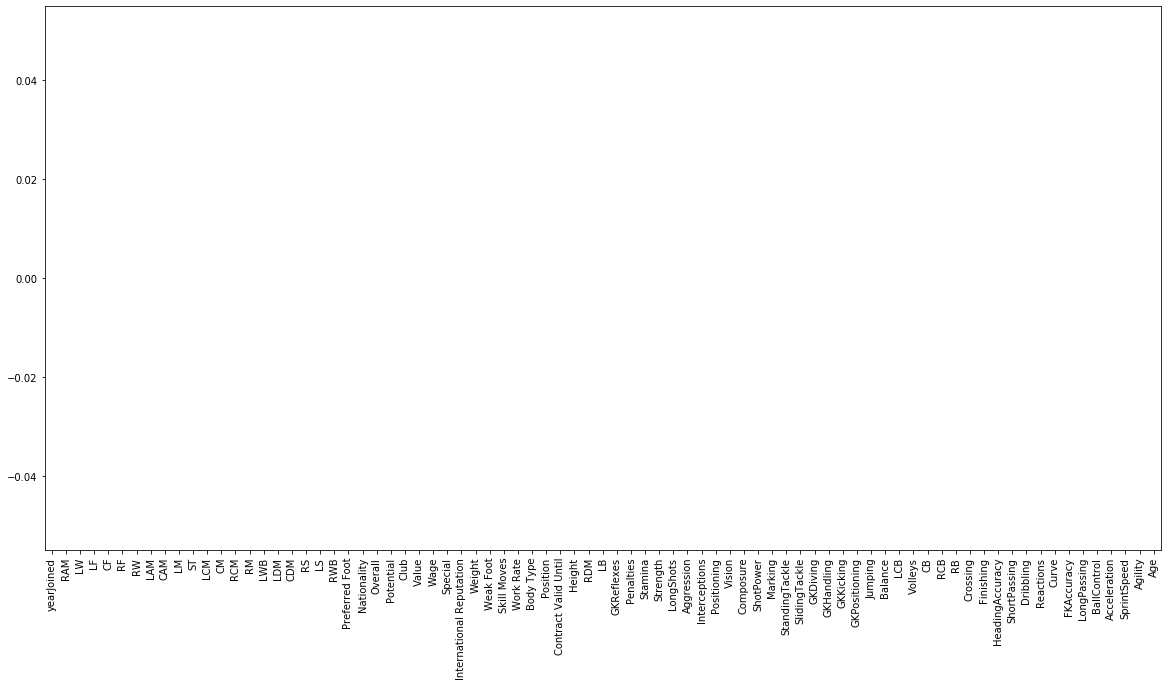

In [11]:
dataWithoutMissingVal = dataWithoutMissingVal.drop(dataWithoutMissingVal[dataWithoutMissingVal['Wage'] == '€0'].index)
plt.figure(figsize=(20,10))
missing_data_3 = dataWithoutMissingVal.isnull().sum().sort_values(ascending=False)
missing_data_3.plot.bar()

# Extract information from dataset
## Change height info from foot/inches to cm (convert from categorical to numeric)


In [12]:
#df = data
data_processing = dataWithoutMissingVal
data_processing['Height_Foot'], data_processing['Height_Inch'] = data_processing['Height'].str.split("'", 1).str
data_processing['Height_Foot'] = data_processing['Height_Foot'].astype('double')
data_processing['Height_Inch'] = data_processing['Height_Inch'].astype('double')
data_processing['Height_cm'] = (data_processing['Height_Foot'] * 12 + data_processing['Height_Inch']) * 2.54

In [13]:
data_processing = data_processing.drop(['Height','Height_Foot','Height_Inch'],axis=1)

In [14]:
weight = data_processing['Weight'].str.extract(r'(\d+)')
data_processing['Weight_lbs'] = weight.astype('float')
data_processing = data_processing.drop(['Weight'],axis=1)

In [15]:
def eval_data(data,columns):
    for colName in columns:
        col_Val = colName + "_val"
        data[col_Val] = data[colName].apply(lambda x: eval(x))
        

In [16]:
list_need_eval_columns = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM'
                     ,'CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB'
                     ,'CB','RCB','RB']
eval_data(data_processing,list_need_eval_columns)

In [17]:
list_after_eval = [data + "_val" for data in list_need_eval_columns]
data_processing = data_processing.drop(list_need_eval_columns,axis=1)

In [18]:
describe(data_processing)

'Data from 1 to 10'

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation
0,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0
1,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0
2,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0
3,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0
4,27,Belgium,91,91,Chelsea,€93M,€340K,2142,Right,4.0


'======================================================================================================'

'Data from 11 to 20'

,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Contract Valid Until,Crossing,Finishing,HeadingAccuracy,ShortPassing
0,4.0,4.0,Medium/ Medium,Messi,RF,2021,84.0,95.0,70.0,90.0
1,4.0,5.0,High/ Low,C. Ronaldo,ST,2022,84.0,94.0,89.0,81.0
2,5.0,5.0,High/ Medium,Neymar,LW,2022,79.0,87.0,62.0,84.0
3,5.0,4.0,High/ High,Normal,RCM,2023,93.0,82.0,55.0,92.0
4,4.0,4.0,High/ Medium,Normal,LF,2020,81.0,84.0,61.0,89.0


'======================================================================================================'

'Data from 21 to 30'

,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions
0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0
1,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0
2,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0
3,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0
4,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0


'======================================================================================================'

'Data from 31 to 40'

,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision
0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0
1,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0
2,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0
3,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0
4,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0


'======================================================================================================'

'Data from 41 to 50'

,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
4,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0


'======================================================================================================'

'Data from 51 to 60'

,yearJoined,Height_cm,Weight_lbs,LS_val,ST_val,RS_val,LW_val,LF_val,CF_val,RF_val
0,2004.0,170.18,159.0,90,90,90,94,95,95,95
1,2018.0,187.96,183.0,94,94,94,92,93,93,93
2,2017.0,175.26,150.0,87,87,87,92,92,92,92
3,2015.0,180.34,154.0,85,85,85,90,90,90,90
4,2012.0,172.72,163.0,86,86,86,92,91,91,91


'======================================================================================================'

'Data from 61 to 70'

,RW_val,LAM_val,CAM_val,RAM_val,LM_val,LCM_val,CM_val,RCM_val,RM_val,LWB_val
0,94,95,95,95,93,86,86,86,93,66
1,92,91,91,91,91,84,84,84,91,68
2,92,92,92,92,91,84,84,84,91,68
3,90,91,91,91,91,90,90,90,91,80
4,92,92,92,92,92,85,85,85,92,69


'======================================================================================================'

'Data from 71 to 79'

,LDM_val,CDM_val,RDM_val,RWB_val,LB_val,LCB_val,CB_val,RCB_val,RB_val
0,63,63,63,66,61,49,49,49,61
1,64,64,64,68,64,56,56,56,64
2,63,63,63,68,63,50,50,50,63
3,80,80,80,80,76,69,69,69,76
4,66,66,66,69,63,52,52,52,63


'======================================================================================================'

In [19]:
import re
def calculate_money(money):
    base = 1
    last = money[-1].casefold()
    if "m".casefold() == last:
        base = 1000000
    elif "k".casefold() == last:
        base = 1000
    
    if base > 1:
        val = (float) (money[1:-1])
    else:
        val = (float) (money[1:])
    return val*base

In [20]:
data_processing['Value_val'] = data_processing['Value'].apply(calculate_money)
data_processing['Wage_val'] = data_processing['Wage'].apply(calculate_money)
data_processing = data_processing.drop(['Value','Wage'],axis=1)

In [21]:
data_processing.head()

,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,CDM_val,RDM_val,RWB_val,LB_val,LCB_val,CB_val,RCB_val,RB_val,Value_val,Wage_val
0,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,4.0,4.0,...,63,63,66,61,49,49,49,61,110500000.0,565000.0
1,33,Portugal,94,94,Juventus,2228,Right,5.0,4.0,5.0,...,64,64,68,64,56,56,56,64,77000000.0,405000.0
2,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,5.0,5.0,...,63,63,68,63,50,50,50,63,118500000.0,290000.0
3,27,Belgium,91,92,Manchester City,2281,Right,4.0,5.0,4.0,...,80,80,80,76,69,69,69,76,102000000.0,355000.0
4,27,Belgium,91,91,Chelsea,2142,Right,4.0,4.0,4.0,...,66,66,69,63,52,52,52,63,93000000.0,340000.0


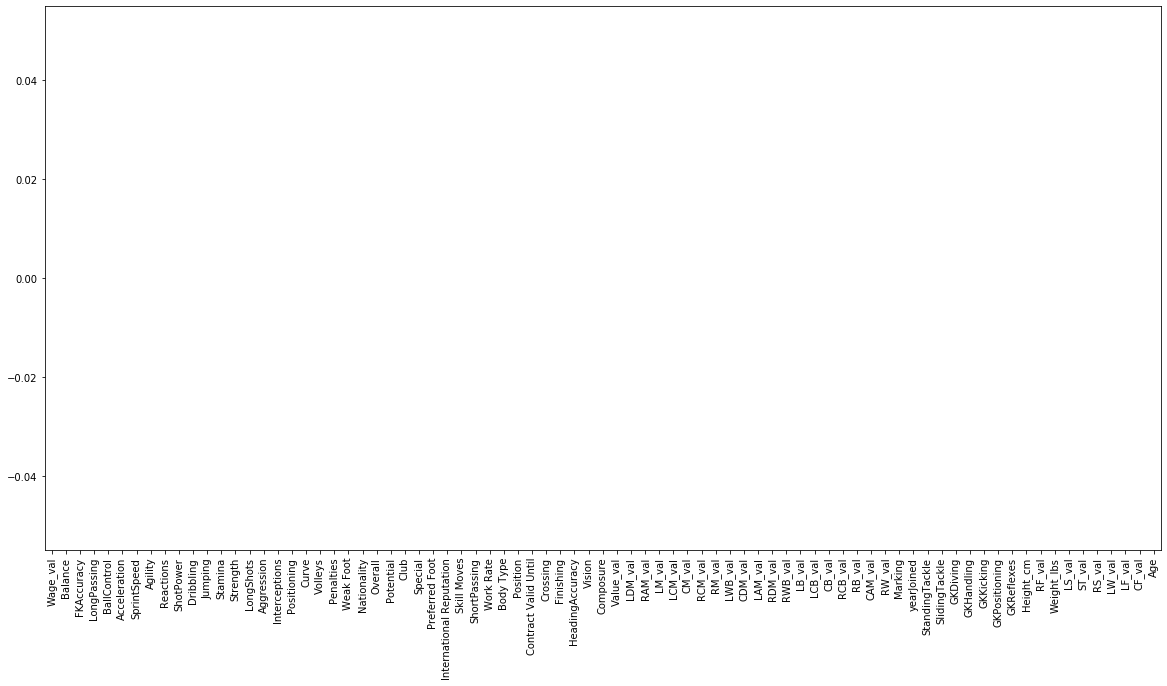

In [22]:
plt.figure(figsize=(20,10))
missing_data_4 = data_processing.isnull().sum().sort_values(ascending=False)
missing_data_4.plot.bar()

In [23]:
data_processing['Weight_lbs'] = data_processing['Weight_lbs'].astype('float')
data_processing['Contract Valid Until'] = data_processing['Contract Valid Until'].apply(lambda x: x[-4:])
data_processing['Contract Valid Until'] = data_processing['Contract Valid Until'].astype('float')

In [24]:
describe(data_processing)

'Data from 1 to 10'

,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves
0,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,4.0,4.0
1,33,Portugal,94,94,Juventus,2228,Right,5.0,4.0,5.0
2,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,5.0,5.0
3,27,Belgium,91,92,Manchester City,2281,Right,4.0,5.0,4.0
4,27,Belgium,91,91,Chelsea,2142,Right,4.0,4.0,4.0


'======================================================================================================'

'Data from 11 to 20'

,Work Rate,Body Type,Position,Contract Valid Until,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling
0,Medium/ Medium,Messi,RF,2021.0,84.0,95.0,70.0,90.0,86.0,97.0
1,High/ Low,C. Ronaldo,ST,2022.0,84.0,94.0,89.0,81.0,87.0,88.0
2,High/ Medium,Neymar,LW,2022.0,79.0,87.0,62.0,84.0,84.0,96.0
3,High/ High,Normal,RCM,2023.0,93.0,82.0,55.0,92.0,82.0,86.0
4,High/ Medium,Normal,LF,2020.0,81.0,84.0,61.0,89.0,80.0,95.0


'======================================================================================================'

'Data from 21 to 30'

,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower
0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0
1,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0
2,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0
3,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0
4,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0


'======================================================================================================'

'Data from 31 to 40'

,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure
0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0
1,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0
2,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0
3,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0
4,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0


'======================================================================================================'

'Data from 41 to 50'

,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,yearJoined,Height_cm
0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2004.0,170.18
1,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2018.0,187.96
2,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2017.0,175.26
3,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,2015.0,180.34
4,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,2012.0,172.72


'======================================================================================================'

'Data from 51 to 60'

,Weight_lbs,LS_val,ST_val,RS_val,LW_val,LF_val,CF_val,RF_val,RW_val,LAM_val
0,159.0,90,90,90,94,95,95,95,94,95
1,183.0,94,94,94,92,93,93,93,92,91
2,150.0,87,87,87,92,92,92,92,92,92
3,154.0,85,85,85,90,90,90,90,90,91
4,163.0,86,86,86,92,91,91,91,92,92


'======================================================================================================'

'Data from 61 to 70'

,CAM_val,RAM_val,LM_val,LCM_val,CM_val,RCM_val,RM_val,LWB_val,LDM_val,CDM_val
0,95,95,93,86,86,86,93,66,63,63
1,91,91,91,84,84,84,91,68,64,64
2,92,92,91,84,84,84,91,68,63,63
3,91,91,91,90,90,90,91,80,80,80
4,92,92,92,85,85,85,92,69,66,66


'======================================================================================================'

'Data from 71 to 79'

,RDM_val,RWB_val,LB_val,LCB_val,CB_val,RCB_val,RB_val,Value_val,Wage_val
0,63,66,61,49,49,49,61,110500000.0,565000.0
1,64,68,64,56,56,56,64,77000000.0,405000.0
2,63,68,63,50,50,50,63,118500000.0,290000.0
3,80,80,76,69,69,69,76,102000000.0,355000.0
4,66,69,63,52,52,52,63,93000000.0,340000.0


'======================================================================================================'

# After cleaning data and transform into correct data form we want to perform encoding categorical before performing machine learning algorithm

In [25]:
df = data_processing.drop(["Nationality","Club","Body Type","Preferred Foot","yearJoined","Contract Valid Until"], axis=1)
df["Max_Pos_val"] = df[["LS_val","ST_val","RS_val","LW_val","LF_val","CF_val","RF_val","RW_val","LAM_val","CAM_val","RAM_val","LM_val","LCM_val","CM_val","RCM_val","RM_val","LWB_val","LDM_val","CDM_val","RDM_val","RWB_val","LB_val","LCB_val","CB_val","RCB_val","RB_val"]].max(axis=1)
df["Max_GK"] = df[["GKDiving","GKHandling","GKKicking","GKPositioning","GKReflexes"]].max(axis=1)
dfWithDummies = pd.get_dummies(df)
describe(dfWithDummies)

'Data from 1 to 10'

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy
0,31,94,94,2202,5.0,4.0,4.0,84.0,95.0,70.0
1,33,94,94,2228,5.0,4.0,5.0,84.0,94.0,89.0
2,26,92,93,2143,5.0,5.0,5.0,79.0,87.0,62.0
3,27,91,92,2281,4.0,5.0,4.0,93.0,82.0,55.0
4,27,91,91,2142,4.0,4.0,4.0,81.0,84.0,61.0


'======================================================================================================'

'Data from 11 to 20'

,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility
0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0
1,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0
2,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0
3,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0
4,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0


'======================================================================================================'

'Data from 21 to 30'

,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning
0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0
1,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0
2,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0
3,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0
4,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0


'======================================================================================================'

'Data from 31 to 40'

,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning
0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0
1,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0
2,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0
3,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0
4,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0


'======================================================================================================'

'Data from 41 to 50'

,GKReflexes,Height_cm,Weight_lbs,LS_val,ST_val,RS_val,LW_val,LF_val,CF_val,RF_val
0,8.0,170.18,159.0,90,90,90,94,95,95,95
1,11.0,187.96,183.0,94,94,94,92,93,93,93
2,11.0,175.26,150.0,87,87,87,92,92,92,92
3,13.0,180.34,154.0,85,85,85,90,90,90,90
4,8.0,172.72,163.0,86,86,86,92,91,91,91


'======================================================================================================'

'Data from 51 to 60'

,RW_val,LAM_val,CAM_val,RAM_val,LM_val,LCM_val,CM_val,RCM_val,RM_val,LWB_val
0,94,95,95,95,93,86,86,86,93,66
1,92,91,91,91,91,84,84,84,91,68
2,92,92,92,92,91,84,84,84,91,68
3,90,91,91,91,91,90,90,90,91,80
4,92,92,92,92,92,85,85,85,92,69


'======================================================================================================'

'Data from 61 to 70'

,LDM_val,CDM_val,RDM_val,RWB_val,LB_val,LCB_val,CB_val,RCB_val,RB_val,Value_val
0,63,63,63,66,61,49,49,49,61,110500000.0
1,64,64,64,68,64,56,56,56,64,77000000.0
2,63,63,63,68,63,50,50,50,63,118500000.0
3,80,80,80,80,76,69,69,69,76,102000000.0
4,66,66,66,69,63,52,52,52,63,93000000.0


'======================================================================================================'

'Data from 71 to 80'

,Wage_val,Max_Pos_val,Max_GK,Work Rate_High/ High,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High
0,565000.0,95,15.0,0,0,0,0,0,0,0
1,405000.0,94,15.0,0,1,0,0,0,0,0
2,290000.0,92,15.0,0,0,1,0,0,0,0
3,355000.0,91,15.0,1,0,0,0,0,0,0
4,340000.0,92,12.0,0,0,1,0,0,0,0


'======================================================================================================'

'Data from 81 to 90'

,Work Rate_Medium/ Low,Work Rate_Medium/ Medium,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_LAM,Position_LB,Position_LCB
0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 91 to 100'

,Position_LCM,Position_LDM,Position_LF,Position_LM,Position_LS,Position_LW,Position_LWB,Position_RAM,Position_RB,Position_RCB
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 101 to 108'

,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


'======================================================================================================'

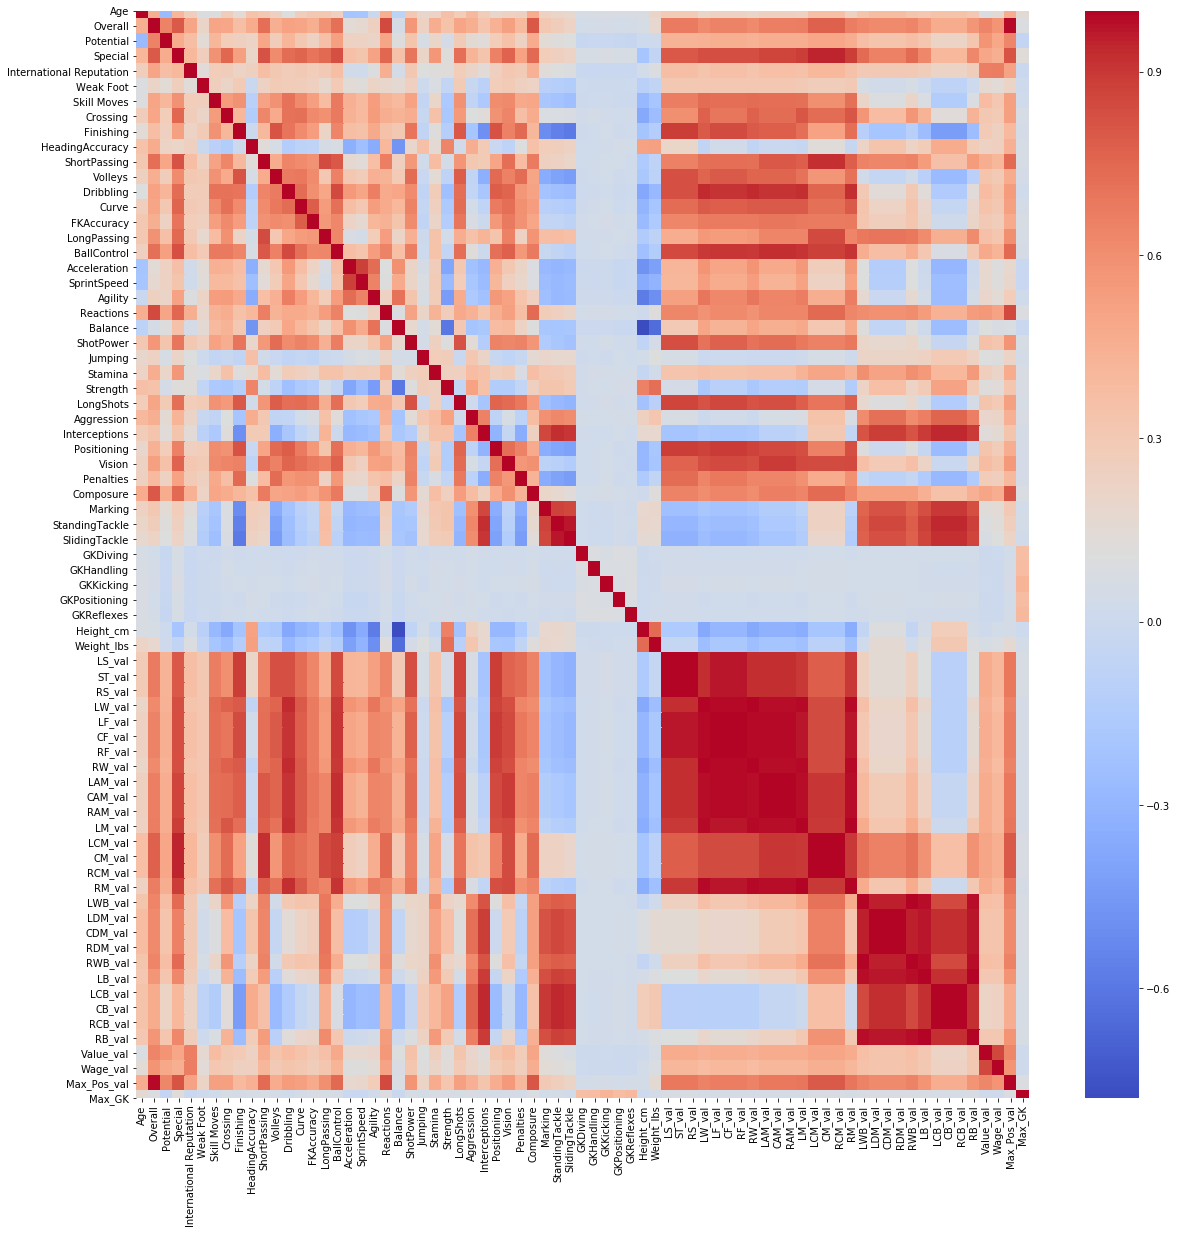

In [26]:
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap="coolwarm")

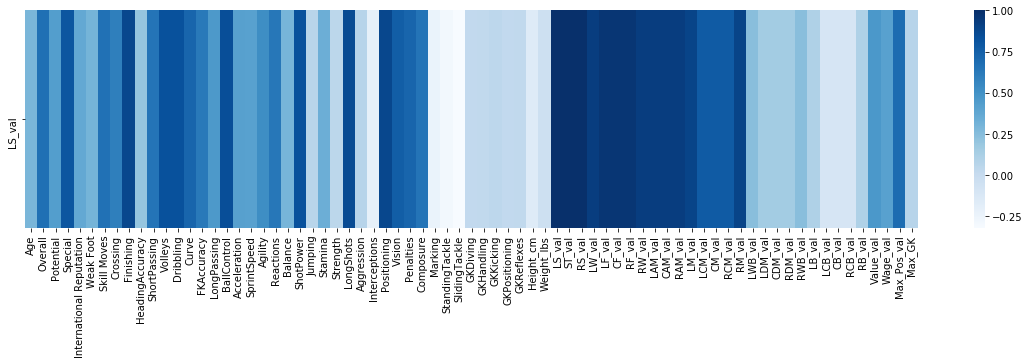

In [27]:
plt.figure(figsize=(20,4))
goal_corr = corr.sort_values(by=['LS_val'], ascending=False).head(1)
sns.heatmap(goal_corr, 
        cmap="Blues")

# Data preprocessing is done. Now we can try to run some ML algorithm
## We first split our dataset into train and test

In [28]:
X = dfWithDummies.drop(['Value_val'],axis=1)
y = dfWithDummies['Value_val']

# Try Adaboost algorithm

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
ada = AdaBoostRegressor(n_estimators=5000,random_state=7)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error with ada' , mae)

Mean Absolute Error with ada 6188061.606626937


# Try Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=70, random_state=0)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error with RF' , mae)

Mean Absolute Error with RF 130449.50197415649


# Try linear regression

In [35]:
%%time
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression(normalize=True)
linear_regressor.fit(X_train, y_train,)
y_pred = linear_regressor.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error with Linear Regression no scaled' , mae)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
linear_regressor = LinearRegression(normalize=True)
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error with Linear Regression scaled' , mae)

Mean Absolute Error with Linear Regression no scaled 1322343.8444487748
Mean Absolute Error with Linear Regression scaled 1329354.127133088
Wall time: 130 ms


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

def runRandomForest(X,y,tree_numbers):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    regressor = RandomForestRegressor(n_estimators=tree_numbers, random_state=0, oob_score=True)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    oob_score = regressor.oob_score_
    print('Mean Absolute Error with ' + str(tree_numbers) + " tree: ", mae)
    print('Oob score with ' + str(tree_numbers) + " tree: ", oob_score)
    #print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    #print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    return mae,oob_score

In [63]:
tree = 10
tree_interval = 10

tree_numbers,MAE,OOB = [],[],[]
while tree <= 200:
    tree_numbers.append(str(tree))
    mae,oob_score = runRandomForest(X,y,tree)
    MAE.append(mae)
    OOB.append(oob_score)
    tree+=tree_interval

C:\Users\BaoHau\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Mean Absolute Error with 10 tree:  135138.97613065326
Oob score with 10 tree:  0.9596115707873574


C:\Users\BaoHau\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Mean Absolute Error with 20 tree:  131711.91896984924
Oob score with 20 tree:  0.9789756845374405
Mean Absolute Error with 30 tree:  132622.59212730319
Oob score with 30 tree:  0.9787762206747631
Mean Absolute Error with 40 tree:  133587.07600502513
Oob score with 40 tree:  0.9797887991698419
Mean Absolute Error with 50 tree:  131042.21105527638
Oob score with 50 tree:  0.9800045832819991
Mean Absolute Error with 60 tree:  130418.65577889448
Oob score with 60 tree:  0.9795476528617383
Mean Absolute Error with 70 tree:  130852.36450107681
Oob score with 70 tree:  0.9802608941969593
Mean Absolute Error with 80 tree:  132178.9023241206
Oob score with 80 tree:  0.9804711595575183
Mean Absolute Error with 90 tree:  131814.73338916805
Oob score with 90 tree:  0.9804278486251891
Mean Absolute Error with 100 tree:  132393.6400753769
Oob score with 100 tree:  0.9800749752090507
Mean Absolute Error with 110 tree:  132783.0773184102
Oob score with 110 tree:  0.9798932454571757
Mean Absolute Error

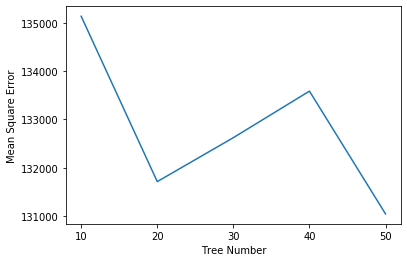

In [42]:
MAE_df = pd.DataFrame(list(zip(tree_numbers, MAE)), 
               columns =['Tree Number', 'Mean Square Error']) 

sns.lineplot(x="Tree Number", y="Mean Square Error", data= MAE_df)

In [43]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
regressor = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate=0.1, max_depth=5, n_estimators=200)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

C:\Users\BaoHau\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MAE:  107704.51548146004


# Manually tuning XGBoost

In [46]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
xgb1 = XGBRegressor(
 learning_rate =0.05,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 booster='gbtree',
 scale_pos_weight=1,
 seed=27)
#modelfit(xgb1, X_train,y_train)
alg = xgb1
useTrainCV=True
cv_folds=5
#early_stopping_rounds=50
xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
    metrics=['rmse','mae'])
alg.set_params(n_estimators=cvresult.shape[0])

#Fit the algorithm on the data
alg.fit(X_train, y_train,eval_metric="rmse")

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=27, silent=None, subsample=0.8, verbosity=1)

In [47]:
y_pred = alg.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

106675.27137487977

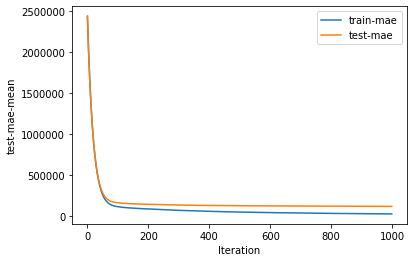

In [48]:
alg_005 = alg
cvresult_005 = cvresult
cvresult_005["Iteration"] = cvresult_005.index
sns.lineplot(x="Iteration",y="train-mae-mean",data=cvresult_005,label="train-mae")
sns.lineplot(x="Iteration",y="test-mae-mean",data=cvresult_005,label="test-mae")


In [112]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
xgb1 = XGBRegressor(
 learning_rate =0.08,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 booster='gbtree',
 scale_pos_weight=1,
 seed=27)
#modelfit(xgb1, X_train,y_train)
alg = xgb1
useTrainCV=True
cv_folds=5
#early_stopping_rounds=50
xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
    metrics=['rmse','mae'])
alg.set_params(n_estimators=cvresult.shape[0])

#Fit the algorithm on the data
alg.fit(X_train, y_train,eval_metric="rmse")
alg_008 = alg
cvresult_008 = cvresult

C:\Users\BaoHau\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


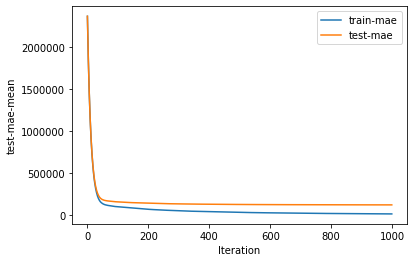

In [113]:
cvresult_008["Iteration"] = cvresult_008.index
sns.lineplot(x="Iteration",y="train-mae-mean",data=cvresult_008,label="train-mae")
sns.lineplot(x="Iteration",y="test-mae-mean",data=cvresult_008,label="test-mae")

In [341]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 booster='gbtree',
 scale_pos_weight=1,
 seed=27)
#modelfit(xgb1, X_train,y_train)
alg = xgb1
useTrainCV=True
cv_folds=5
#early_stopping_rounds=50
xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
    metrics='mae')
alg.set_params(n_estimators=cvresult.shape[0])

#Fit the algorithm on the data
alg.fit(X_train, y_train,eval_metric="mae")
alg_01 = alg
cvresult_01 = cvresult

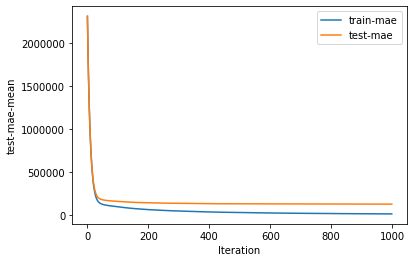

In [342]:
cvresult_01["Iteration"] = cvresult_01.index
sns.lineplot(x="Iteration",y="train-mae-mean",data=cvresult_01,label="train-mae")
sns.lineplot(x="Iteration",y="test-mae-mean",data=cvresult_01,label="test-mae")


In [343]:
y_pred_01 = alg_01.predict(X_test)
mae_01 = metrics.mean_absolute_error(y_test, y_pred_01)
print("test mae: " + str(mae_01) + "\n")

test mae: 106824.1502424844



In [126]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
xgb1 = XGBRegressor(
 learning_rate =0.13,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 booster='gbtree',
 scale_pos_weight=1,
 seed=27)
#modelfit(xgb1, X_train,y_train)
alg = xgb1
useTrainCV=True
cv_folds=5
#early_stopping_rounds=50
xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
    metrics=['rmse','mae'])
alg.set_params(n_estimators=cvresult.shape[0])

#Fit the algorithm on the data
alg.fit(X_train, y_train,eval_metric="rmse")
alg_013 = alg
cvresult_013 = cvresult

C:\Users\BaoHau\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [133]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
xgb1 = XGBRegressor(
 learning_rate =0.15,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 booster='gbtree',
 scale_pos_weight=1,
 seed=27)
#modelfit(xgb1, X_train,y_train)
alg = xgb1
useTrainCV=True
cv_folds=5
early_stopping_rounds=50
xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
    metrics=['rmse','mae'])
alg.set_params(n_estimators=cvresult.shape[0])

#Fit the algorithm on the data
alg.fit(X_train, y_train,eval_metric="rmse")
alg_015 = alg
cvresult_015 = cvresult

C:\Users\BaoHau\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


25283.083593800002
117106.659375
test mae: 106675.27137487977

15455.0570312
122675.0937502
test mae: 106934.01303338286

11527.406836
125120.6421876
test mae: 106824.1502424844

7930.125683599998
131521.3531252
test mae: 114206.96037070116

6364.877343800001
132543.7250002
test mae: 125830.64072598405



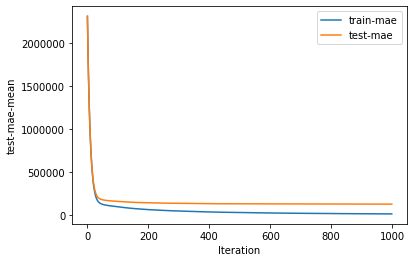

In [135]:
cvresult_01["Iteration"] = cvresult_01.index
sns.lineplot(x="Iteration",y="train-mae-mean",data=cvresult_01,label="train-mae")
sns.lineplot(x="Iteration",y="test-mae-mean",data=cvresult_01,label="test-mae")

print(cvresult_005['train-mae-mean'].min())
print(cvresult_005['test-mae-mean'].min())
y_pred_005 = alg_005.predict(X_test)
mae_005 = metrics.mean_absolute_error(y_test, y_pred_005)
print("test mae: " + str(mae_005) + "\n")

print(cvresult_008['train-mae-mean'].min())
print(cvresult_008['test-mae-mean'].min())

y_pred_008 = alg_008.predict(X_test)
mae_008 = metrics.mean_absolute_error(y_test, y_pred_008)
print("test mae: " + str(mae_008) + "\n")

print(cvresult_01['train-mae-mean'].min())
print(cvresult_01['test-mae-mean'].min())

y_pred_01 = alg_01.predict(X_test)
mae_01 = metrics.mean_absolute_error(y_test, y_pred_01)
print("test mae: " + str(mae_01) + "\n")

print(cvresult_013['train-mae-mean'].min())
print(cvresult_013['test-mae-mean'].min())

y_pred_013 = alg_013.predict(X_test)
mae_013 = metrics.mean_absolute_error(y_test, y_pred_013)
print("test mae: " + str(mae_013) + "\n")

print(cvresult_015['train-mae-mean'].min())
print(cvresult_015['test-mae-mean'].min())

y_pred_015 = alg_015.predict(X_test)
mae_015 = metrics.mean_absolute_error(y_test, y_pred_015)
print("test mae: " + str(mae_015) + "\n")

## Tuning min_child_weight, max_depth for XGBoost

In [210]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 booster='gbtree',
 scale_pos_weight=1,
 seed=27), 
 param_grid = param_test1, scoring="neg_mean_absolute_error",n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

C:\Users\BaoHau\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\Users\BaoHau\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


({'max_depth': 5, 'min_child_weight': 1}, -121437.54028336944)

In [344]:
gsearch1.cv_results_

{'mean_fit_time': array([35.36608939, 35.76858115, 36.26416674, 53.70890322, 52.66125164,
        50.31062593, 73.43397198, 70.08525853, 67.43951592, 97.27500205,
        91.72634554, 82.44600925]),
 'std_fit_time': array([0.30610414, 1.3561532 , 0.91637192, 1.10035356, 0.41822838,
        1.39849643, 2.25053971, 1.23154302, 1.15367719, 1.32845158,
        1.07277672, 3.79355562]),
 'mean_score_time': array([0.06961913, 0.06659598, 0.08359542, 0.13018713, 0.12155828,
        0.11954679, 0.24531078, 0.21020679, 0.18613086, 0.42234888,
        0.33959932, 0.29334984]),
 'std_score_time': array([0.0073655 , 0.00125704, 0.0160555 , 0.0106849 , 0.00634023,
        0.00827554, 0.01915078, 0.00644136, 0.01532291, 0.08599928,
        0.05226055, 0.04802818]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             

In [213]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
 'max_depth':[4,5,6],
 'min_child_weight':[1,2]
}

gsearch2 = GridSearchCV(estimator = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 booster='gbtree',
 scale_pos_weight=1,
 seed=27), 
 param_grid = param_test1, scoring="neg_mean_absolute_error",n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 5, 'min_child_weight': 2}, -121165.16285061734)

In [229]:
gsearch2.cv_results_


{'mean_fit_time': array([39.29482908, 39.13494301, 47.40431695, 47.79986353, 57.30789104,
        53.61213222]),
 'std_fit_time': array([0.17835688, 0.2089828 , 0.4953532 , 0.40815037, 0.29290714,
        2.88740522]),
 'mean_score_time': array([0.08202772, 0.08612928, 0.12728024, 0.12417517, 0.17858548,
        0.146527  ]),
 'std_score_time': array([0.00447171, 0.00192294, 0.00707452, 0.00834851, 0.00829529,
        0.00586643]),
 'param_max_depth': masked_array(data=[4, 4, 5, 5, 6, 6],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[1, 2, 1, 2, 1, 2],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 4, 'min_child_weight': 1},
  {'max_depth': 4, 'min_child_weight': 2},
  {'max_depth': 5, 'min_child_weight': 1},
  {'max_depth': 5, 'min_child_weight': 2},
  {'max_depth': 6, 'min_child

In [230]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
 'max_depth':[4,5,6],
 'min_child_weight':[2,3]
}

gsearch3 = GridSearchCV(estimator = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 booster='gbtree',
 scale_pos_weight=1,
 seed=27), 
 param_grid = param_test1, scoring="neg_mean_absolute_error",n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

C:\Users\BaoHau\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\Users\BaoHau\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


({'max_depth': 5, 'min_child_weight': 2}, -121165.16285061734)

In [231]:
gsearch3.cv_results_

{'mean_fit_time': array([47.38141384, 46.65710506, 59.16922755, 58.85340648, 71.3070394 ,
        63.14645085]),
 'std_fit_time': array([0.82379545, 1.43192895, 1.68223106, 1.35767261, 0.8232098 ,
        7.25232652]),
 'mean_score_time': array([0.09128904, 0.10112028, 0.13615642, 0.15844102, 0.22351489,
        0.15470247]),
 'std_score_time': array([0.00406792, 0.00531399, 0.01349474, 0.04203794, 0.04816612,
        0.01899922]),
 'param_max_depth': masked_array(data=[4, 4, 5, 5, 6, 6],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 4, 'min_child_weight': 2},
  {'max_depth': 4, 'min_child_weight': 3},
  {'max_depth': 5, 'min_child_weight': 2},
  {'max_depth': 5, 'min_child_weight': 3},
  {'max_depth': 6, 'min_child

In [238]:
param_test4 = {
 'gamma':[0,0.03,0.1,0.3,1,3,9]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

gsearch4 = GridSearchCV(estimator = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 booster='gbtree',
 scale_pos_weight=1,
 seed=27), 
 param_grid = param_test4, scoring="neg_mean_absolute_error",n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

C:\Users\BaoHau\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\Users\BaoHau\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


({'gamma': 0}, -121070.83520918332)

In [345]:
print('new result')
gsearch4.cv_results_

new result


{'mean_fit_time': array([53.92813015, 61.40130415, 57.45503216, 63.05761685, 59.79160113,
        60.3085392 , 53.80121245]),
 'std_fit_time': array([4.50303726, 1.76392095, 1.5038121 , 3.31585711, 0.4762985 ,
        0.72853732, 4.43145556]),
 'mean_score_time': array([0.12727962, 0.13514495, 0.18440323, 0.2474659 , 0.13783975,
        0.14929967, 0.1120985 ]),
 'std_score_time': array([0.00746291, 0.00945691, 0.04005946, 0.09560397, 0.00642876,
        0.01861248, 0.01077038]),
 'param_gamma': masked_array(data=[0, 0.03, 0.1, 0.3, 1, 3, 9],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 0},
  {'gamma': 0.03},
  {'gamma': 0.1},
  {'gamma': 0.3},
  {'gamma': 1},
  {'gamma': 3},
  {'gamma': 9}],
 'split0_test_score': array([-119411.79418265, -119411.79418265, -119411.79418265,
        -119411.79418265, -119411.79418265, -119411.79418265,
        -119411.79418265]),
 'split1_test_score': arra

In [237]:
gsearch4.cv_results_

{'mean_fit_time': array([51.9024354 , 52.05499129, 54.60863605, 57.81381278, 57.416046  ,
        54.09686055, 53.05180278]),
 'std_fit_time': array([0.41992605, 1.28549496, 3.22882611, 0.31692519, 1.26560554,
        0.79396935, 0.40157646]),
 'mean_score_time': array([0.15540271, 0.13559527, 0.13713169, 0.13544784, 0.14780664,
        0.14169693, 0.1290204 ]),
 'std_score_time': array([0.01701074, 0.01047146, 0.00973774, 0.0109475 , 0.01754988,
        0.00906252, 0.025644  ]),
 'param_gamma': masked_array(data=[0, 0.03, 0.1, 0.3, 1, 3, 9],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 0},
  {'gamma': 0.03},
  {'gamma': 0.1},
  {'gamma': 0.3},
  {'gamma': 1},
  {'gamma': 3},
  {'gamma': 9}],
 'split0_test_score': array([-118504.75808626, -118504.75808626, -118504.75808626,
        -118504.75808626, -118504.75808626, -118504.75808626,
        -118504.75808626]),
 'split1_test_score': arra

In [240]:
param_test5 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

gsearch5 = GridSearchCV(estimator = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 booster='gbtree',
 scale_pos_weight=1,
 seed=27), 
 param_grid = param_test5, scoring="neg_mean_absolute_error",n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.best_params_, gsearch5.best_score_


({'colsample_bytree': 0.9, 'subsample': 0.9}, -119793.27121038959)

In [241]:
gsearch5.cv_results_

{'mean_fit_time': array([46.64208646, 42.73546057, 41.44459524, 39.20793777, 46.54740372,
        46.04869685, 46.59318705, 44.93744416, 55.81150951, 54.66844049,
        52.50595946, 54.23327565, 65.94638362, 63.35772648, 66.29853539,
        76.1720058 ]),
 'std_fit_time': array([1.30540019, 0.60344867, 0.49643026, 0.17352464, 0.61220757,
        0.14584361, 1.95538595, 0.86926308, 0.726742  , 1.00644254,
        0.59650747, 1.6428452 , 0.88561039, 2.32223102, 1.39423721,
        5.71258437]),
 'mean_score_time': array([0.13874302, 0.12580137, 0.12997718, 0.12206182, 0.11560087,
        0.11907864, 0.1249876 , 0.12395515, 0.12551913, 0.12902837,
        0.12637424, 0.14510779, 0.14378877, 0.14362068, 0.22492185,
        0.20021558]),
 'std_score_time': array([0.01064535, 0.00438487, 0.00822652, 0.00420003, 0.00343526,
        0.00324466, 0.00279249, 0.00241405, 0.00646428, 0.00800874,
        0.00520239, 0.01039967, 0.01237408, 0.02241142, 0.02077429,
        0.04602289]),
 'param_co

In [243]:
param_test6 = {
 'subsample':[i/10.0 for i in range(9,11)],
 'colsample_bytree':[i/10.0 for i in range(9,11)]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

gsearch6 = GridSearchCV(estimator = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 booster='gbtree',
 scale_pos_weight=1,
 seed=27), 
 param_grid = param_test6, scoring="neg_mean_absolute_error",n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train,y_train)
gsearch6.best_params_, gsearch6.best_score_


C:\Users\BaoHau\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\Users\BaoHau\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


({'colsample_bytree': 1.0, 'subsample': 0.9}, -111890.79935023797)

In [244]:
gsearch6.cv_results_

{'mean_fit_time': array([55.23207974, 53.17817469, 60.85087895, 56.49584522]),
 'std_fit_time': array([0.31602198, 1.24914552, 0.62089028, 0.95032417]),
 'mean_score_time': array([0.1326282 , 0.13101921, 0.14012618, 0.1235528 ]),
 'std_score_time': array([0.00962746, 0.00455528, 0.01035721, 0.0116297 ]),
 'param_colsample_bytree': masked_array(data=[0.9, 0.9, 1.0, 1.0],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_subsample': masked_array(data=[0.9, 1.0, 0.9, 1.0],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'colsample_bytree': 0.9, 'subsample': 0.9},
  {'colsample_bytree': 0.9, 'subsample': 1.0},
  {'colsample_bytree': 1.0, 'subsample': 0.9},
  {'colsample_bytree': 1.0, 'subsample': 1.0}],
 'split0_test_score': array([-113787.74565982, -113392.99553396, -107132.50212911,
        -110160.8971909 ]),
 'split1_test_score': array([-106569.58881006, -122979.

In [246]:
param_test7 = {
 'reg_lambda':[1e-5,3e-5,1e-4,3e-4,1e-2,3e-2,0.1,0.3,1,3,10,30,100,300]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

gsearch7 = GridSearchCV(estimator = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 subsample=0.9,
 colsample_bytree=1,
 objective= 'reg:squarederror',
 booster='gbtree',
 scale_pos_weight=1,
 seed=27), 
 param_grid = param_test7, scoring="neg_mean_absolute_error",n_jobs=4,iid=False, cv=5)
gsearch7.fit(X_train,y_train)
gsearch7.best_params_, gsearch7.best_score_


C:\Users\BaoHau\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\Users\BaoHau\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


({'reg_lambda': 1}, -111890.79935023797)

In [247]:
gsearch7.cv_results_

{'mean_fit_time': array([55.89307675, 55.91189775, 54.43199644, 54.61745558, 55.14179363,
        54.3807909 , 54.99105868, 57.36675482, 55.17397738, 53.37771568,
        52.77562094, 51.99042873, 50.81123629, 49.16087742]),
 'std_fit_time': array([0.23274134, 0.39020962, 0.76338529, 0.33459375, 0.06093829,
        1.17522301, 1.51585848, 0.53275065, 0.6204765 , 0.71201156,
        0.57619046, 0.15538259, 0.14649519, 2.56489675]),
 'mean_score_time': array([0.12485886, 0.12148371, 0.13150616, 0.12881303, 0.12743311,
        0.13343444, 0.12770619, 0.13188648, 0.13769608, 0.1210288 ,
        0.11389289, 0.09335051, 0.09398975, 0.08944588]),
 'std_score_time': array([0.0011602 , 0.00145833, 0.00546215, 0.00644712, 0.00671878,
        0.00802278, 0.0039588 , 0.00623995, 0.01576838, 0.00975577,
        0.00485983, 0.00386773, 0.00258942, 0.00548257]),
 'param_reg_lambda': masked_array(data=[1e-05, 3e-05, 0.0001, 0.0003, 0.01, 0.03, 0.1, 0.3, 1,
                    3, 10, 30, 100, 300],
   

# Apply optimize param from previous steps and change learning_rate, increase estimator size for better result

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tunned_regressor = XGBRegressor(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 reg_lambda=1,
 subsample=0.9,
 colsample_bytree=1,
 objective= 'reg:squarederror',
 booster='gbtree',
 scale_pos_weight=1,
 seed=27)
                        
tunned_regressor.fit(X_train,y_train)

y_pred_tuned = tunned_regressor.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred_tuned)
print("Tuned MAE: ", mae)

C:\Users\BaoHau\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Tuned MAE:  99391.73144224541


In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tunned_regressor = XGBRegressor(
 learning_rate =0.07,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 reg_lambda=1,
 subsample=0.9,
 colsample_bytree=1,
 objective= 'reg:squarederror',
 booster='gbtree',
 scale_pos_weight=1,
 seed=27)
                        
tunned_regressor.fit(X_train,y_train)

y_pred_tuned = tunned_regressor.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred_tuned)
print("Tuned MAE: ", mae)

C:\Users\BaoHau\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Tuned MAE:  97378.42247116625


In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tunned_regressor = XGBRegressor(
 learning_rate =0.05,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 reg_lambda=1,
 subsample=0.9,
 colsample_bytree=1,
 objective= 'reg:squarederror',
 booster='gbtree',
 scale_pos_weight=1,
 seed=27)
                        
tunned_regressor.fit(X_train,y_train)

y_pred_tuned = tunned_regressor.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred_tuned)
print("Tuned MAE: ", mae)

C:\Users\BaoHau\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Tuned MAE:  93031.21491111103


In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tunned_regressor = XGBRegressor(
 learning_rate =0.03,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 reg_lambda=1,
 subsample=0.9,
 colsample_bytree=1,
 objective= 'reg:squarederror',
 booster='gbtree',
 scale_pos_weight=1,
 seed=27)

alg = tunned_regressor
useTrainCV=True
cv_folds=5
#early_stopping_rounds=50
xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
    metrics=['mae'])
alg.set_params(n_estimators=cvresult.shape[0])

#Fit the algorithm on the data
alg.fit(X_train, y_train,eval_metric="mae")
                        
tunned_regressor = alg

y_pred_tuned = tunned_regressor.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred_tuned)
print("Tuned MAE: ", mae)

C:\Users\BaoHau\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Tuned MAE:  93536.4530893067


In [276]:
lr = [0.03,0.05,0.07]
cvresults = []
for l in lr:
    tunned_regressor = XGBRegressor(
     learning_rate =l,
     n_estimators=5000,
     max_depth=5,
     min_child_weight=2,
     gamma=0,
     reg_lambda=1,
     subsample=0.9,
     colsample_bytree=1,
     objective= 'reg:squarederror',
     booster='gbtree',
     scale_pos_weight=1,
     seed=27)

    alg = tunned_regressor
    useTrainCV=True
    cv_folds=5
    #early_stopping_rounds=50
    xgb_param = alg.get_xgb_params()
    xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
    cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
        metrics=['mae'])
    alg.set_params(n_estimators=cvresult.shape[0])
    cvresults.append(cvresult)
    #Fit the algorithm on the data
    alg.fit(X_train, y_train,eval_metric="mae")

    tunned_regressor = alg

    y_pred_tuned = tunned_regressor.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred_tuned)
    print("Tuned MAE ",l,": ", mae)

C:\Users\BaoHau\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Tuned MAE  0.03 :  93536.4530893067


C:\Users\BaoHau\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Tuned MAE  0.05 :  93031.21491111103


C:\Users\BaoHau\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Tuned MAE  0.07 :  97378.42247116625


In [291]:
param_test8 = {
 'learning_rate':[0.01,0.03,0.05,0.07,0.1,0.3,0.5]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

gsearch8 = GridSearchCV(estimator = XGBRegressor(
 learning_rate =0.1,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 subsample=0.9,
 colsample_bytree=1,
 objective= 'reg:squarederror',
 booster='gbtree',
 scale_pos_weight=1,
 seed=27), 
 param_grid = param_test8, scoring="neg_mean_absolute_error",n_jobs=4,iid=False, cv=5)
gsearch8.fit(X_train,y_train)
gsearch8.best_params_, gsearch8.best_score_


C:\Users\BaoHau\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\Users\BaoHau\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


({'learning_rate': 0.05}, -108387.9928374642)

# Feature engineering 1

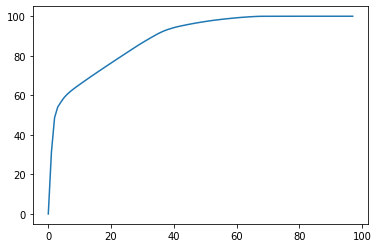

In [338]:
from sklearn.decomposition import PCA

df2 = data_processing.drop(["Nationality","Club","Body Type","Preferred Foot","yearJoined","Contract Valid Until","Skill Moves","Work Rate"], axis=1)
df2["Max_Pos_val"] = df2[["LS_val","ST_val","RS_val","LW_val","LF_val","CF_val","RF_val","RW_val","LAM_val","CAM_val","RAM_val","LM_val","LCM_val","CM_val","RCM_val","RM_val","LWB_val","LDM_val","CDM_val","RDM_val","RWB_val","LB_val","LCB_val","CB_val","RCB_val","RB_val"]].max(axis=1)
df2["Max_GK"] = df2[["GKDiving","GKHandling","GKKicking","GKPositioning","GKReflexes"]].max(axis=1)
dfWithDummies2 = pd.get_dummies(df2)

X2 = dfWithDummies2.drop(['Value_val'],axis=1)
y2 = dfWithDummies2['Value_val']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=0)

sc2 = StandardScaler()
X_train_2 = sc2.fit_transform(X_train_2)
X_test_2 = sc2.transform(X_test_2)

pca2 = PCA().fit(X_train_2)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(20,20))
data = np.cumsum(pca2.explained_variance_ratio_)*100
data = np.insert(data,0,0)
plt.plot(data)
plt.show()


In [296]:
dfWithDummies2.select_dtypes('float').columns

Index(['International Reputation', 'Weak Foot', 'Skill Moves', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Height_cm', 'Weight_lbs',
       'Value_val', 'Wage_val', 'Max_GK'],
      dtype='object')

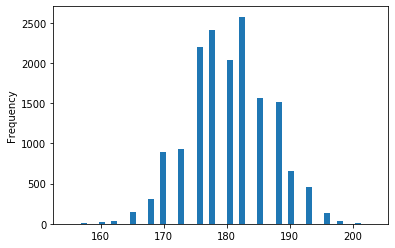

In [301]:
dfWithDummies2["Height_cm"].plot.hist(bins=50)

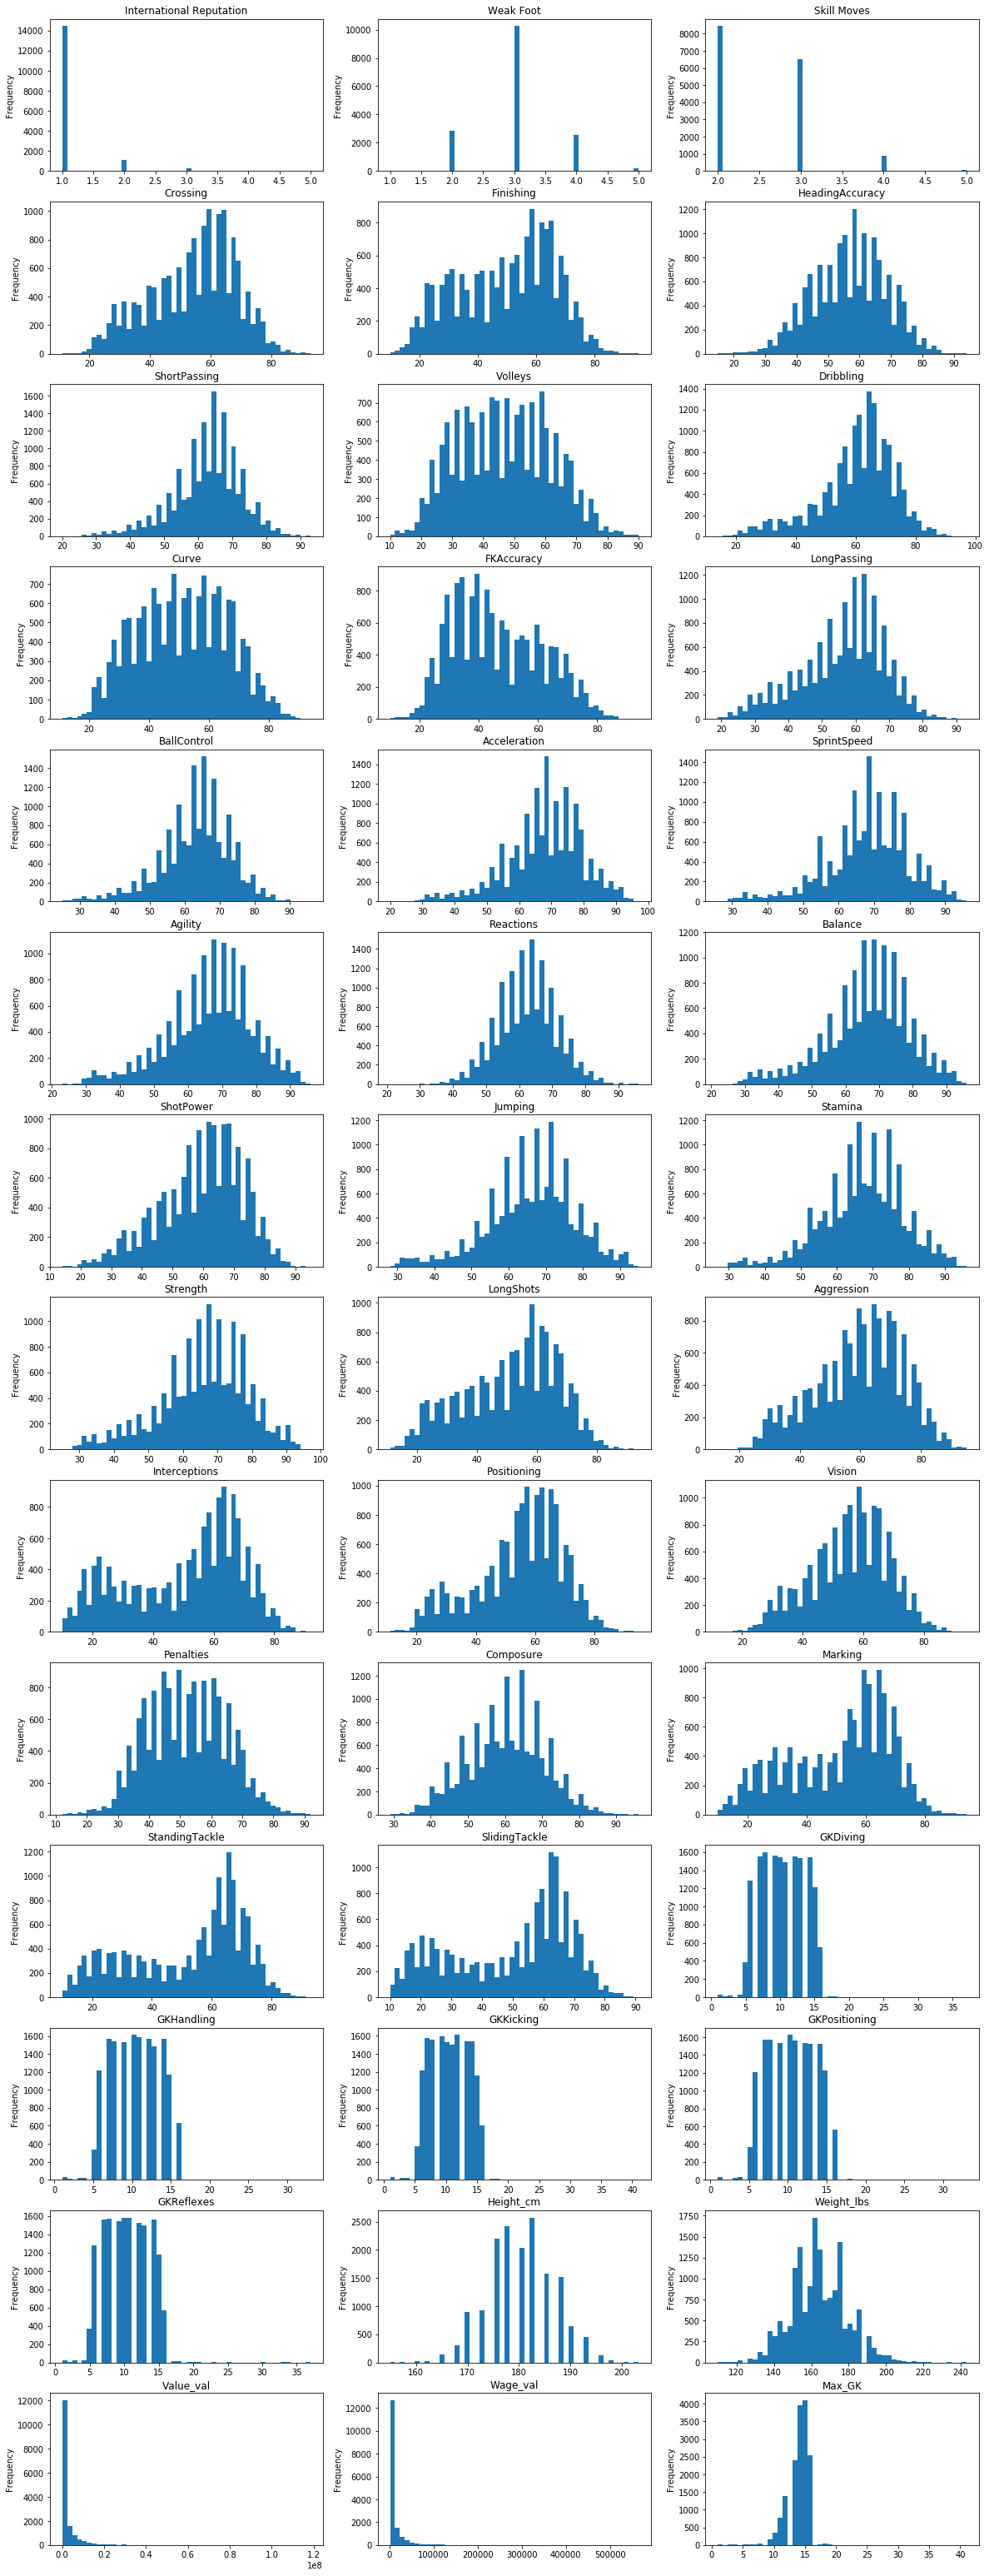

In [303]:
fig = plt.figure(figsize=(20,80))
i = 1
for col in dfWithDummies2.select_dtypes('float').columns:
    plt.subplot(20, 3, i)
    dfWithDummies2[col].plot.hist(bins=50).title.set_text(col)
    i+=1
plt.show()

725000.0
76500000.0


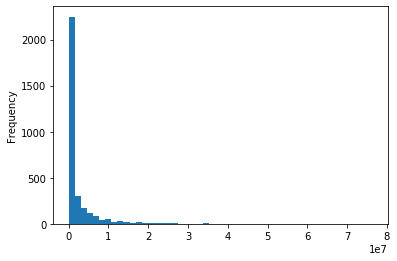

In [353]:
y_test.plot.hist(bins=50)
print(y_test.median())

print(y_test.max())

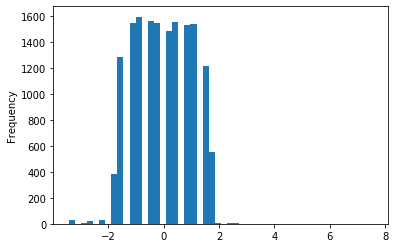

In [332]:
from sklearn.preprocessing import StandardScaler, power_transform

#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(dfWithDummies2)
testDf = dfWithDummies2[['GKDiving','GKHandling']]
transformed = power_transform(testDf, method='box-cox')
Diving = transformed.transpose()[0]
Handling = transformed.transpose()[1]
sDiving = pd.Series(Diving)
sDiving.plot.hist(bins=50)

In [203]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 booster='gbtree',
 scale_pos_weight=1,
 seed=27)
#modelfit(xgb1, X_train,y_train)
alg = xgb1
useTrainCV=True
cv_folds=5
early_stopping_rounds=50
xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
    metrics=['rmse','mae'])
alg.set_params(n_estimators=cvresult.shape[0])

#Fit the algorithm on the data
alg.fit(X_train, y_train,eval_metric="rmse")
alg_01 = alg
cvresult_01 = cvresult

C:\Users\BaoHau\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [339]:
y_pred_01 = alg_01.predict(X_test)
mae_01 = metrics.mean_absolute_error(y_test, y_pred_01)
mae_01#Learning rate 0.1

116564.02775834434

In [208]:
cvresult_01['test-mae-mean'].min()
cvresult_01['train-mae-mean'].min()

53104.9226564

In [205]:
y_pred_01_after = alg_01.predict(X_test)
mae_01_after = metrics.mean_absolute_error(y_test, y_pred_01_after)
print(mae_01_after)

116564.02775834434


In [84]:
#(cvresult['train-mae-mean']).plot.line()

#display(cvresult['train-mae-mean'])
#y_pred = alg.predict(X_test)
#mae = metrics.mean_absolute_error(y_test, y_pred)
#print("MAE: ",mae)#Learning rate 0.2
print("min: ",cvresult['train-mae-mean'][cvresult['train-mae-mean'] <= cvresult['train-mae-mean'].min()])

z = cvresult['train-mae-mean'] <= cvresult['train-mae-mean'].min() + 2000
cvresult['train-mae-mean'][z]

min:  999    3849.997461
Name: train-mae-mean, dtype: float64


829    5838.769238
830    5821.648633
831    5806.895215
832    5792.542480
833    5777.113965
          ...     
995    3884.560986
996    3876.545557
997    3866.115283
998    3857.234522
999    3849.997461
Name: train-mae-mean, Length: 171, dtype: float64

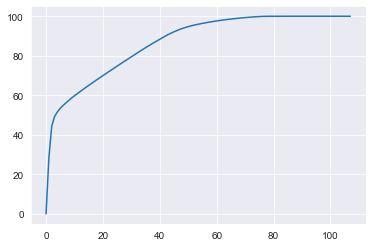

In [172]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_processing_1 = data_processing.drop(["Nationality","Club","Body Type","Preferred Foot"],axis=1)
df_1 = pd.get_dummies(data_processing_1)

X1 = df_1.drop(['Value_val'],axis=1)
y1 = df_1['Value_val']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=0)

sc1 = StandardScaler()
X_train_1 = sc1.fit_transform(X_train_1)
X_test_1 = sc1.transform(X_test_1)

pca = PCA().fit(X_train_1)
#Plotting the Cumulative Summation of the Explained Variance
data = np.cumsum(pca.explained_variance_ratio_)*100
data = np.insert(data,0,0)
plt.plot(data)
plt.show()

In [167]:
np.where(pca.components_[0:2, :] >0.002)

print(pca.components_[0:2, :].shape)
[pca.components_[0:2, :]>0.002]

(2, 107)


[array([[False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False,  True,  True],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False

In [160]:
a = np.sort(pca.components_[0])
z = pca.components_[0]
z1 = z[z>0.2]
z > 0.5
#a123 = np.where(z.any(z>0.2))

abc = np.any(z>0.2)
abc = np.where(z>0.001)
a

array([-1.39625571e-05, -2.81638795e-06, -5.52920634e-07, -3.49489762e-07,
       -2.49260960e-07, -2.27019112e-07, -1.61631137e-07, -1.17225555e-07,
       -7.28414339e-08, -5.86879658e-08, -4.96590258e-08, -4.15782353e-08,
       -2.22657318e-08, -1.86586992e-08, -1.55096076e-08, -9.03898417e-09,
        1.25532089e-09,  2.46098049e-08,  2.50513396e-08,  3.47612390e-08,
        4.42483582e-08,  5.33394434e-08,  8.14861928e-08,  1.04761495e-07,
        1.07329749e-07,  1.21243286e-07,  1.25634138e-07,  1.28277689e-07,
        1.32332183e-07,  1.33999156e-07,  1.58186034e-07,  1.71360191e-07,
        1.92625693e-07,  1.96871766e-07,  4.05007279e-07,  6.92124717e-07,
        8.78785246e-07,  9.06914887e-07,  9.21749006e-07,  1.23953877e-06,
        1.38501716e-06,  3.86154279e-06,  8.32374203e-06,  8.65838474e-06,
        1.00784927e-05,  1.17545061e-05,  2.99170954e-05,  4.17685581e-05,
        5.39204483e-05,  5.84683728e-05,  6.09620328e-05,  6.31175163e-05,
        7.42310320e-05,  

In [473]:
goal_corr = corr.sort_values(by=['Value_val'], ascending=False).head(1)